In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

def qkhfs( w, h ):
    """
    Quick iterative calculation of kh in gravity-wave dispersion relationship
    kh = qkhfs(w, h )
    
    Input
        w - angular wave frequency = 2*pi/T where T = wave period [1/s]
        h - water depth [m]
    Returns
        kh - wavenumber * depth [m]

    Orbital velocities from kh are accurate to 3e-12 !

    RL Soulsby (2006) \"Simplified calculation of wave orbital velocities\"
    HR Wallingford Report TR 155, February 2006
    Eqns. 12a - 14
    """
    g = 9.81
    x = w**2.0 *h/g
    y = np.sqrt(x) * (x<1.) + x *(x>=1.)
    # This appalling bit of code is faster than a loop in Matlab and Fortran
    # but have not tested speed in Python.
    t = np.tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    t = np.tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    t = np.tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    kh = y
    return kh

def ursell( aw, k, h ):
    """
    Calculate Ursell number
    Ur = ursell( aw, k, h)
        
    The Ursell number is a measure of asymmetry based on Stokes 2nd order
    wave equations and strictly speaking applies to shallow water (kh<1).
    It proportiona to the ratio of the 2nd order wave height term over
    the 1st order term.
    
    Input:
        aw = wave amplitude (H/2) [m/s]
        k  = wave number []
        h  = water depth [m]
        
    Returns:
        Ursell number
        
    Reussink et al. Eqn 6.
    """
    return (3./4.)*aw*k/(k*h)**3.

def urms_25( Hs, Tp, h ):
    """
    Calculate u_rms for JONSWAP spectr
    urms = urms_28( Hs, Tp, h )
    
    Equation 25 in Soulsby, R. L. (2006), "Simplified calculation of 
    wave orbital velocities". Report TR 155, Release 1.0, Feb. 2006.
    HR Wallingford.
    
    """
    Tz = Tp/1.28           # can't remember where I found this
    Tz = 0.777*Tp          # very similar: Tucker & Pitt, p. 103 
    Tn = ( h/g )**(1./2.)                      # Eqn 8
    t = Tn /Tz                                 # Eqn 27
    A = (6500.+(0.56 + 15.54*t)**6)**(1./6.)   # Eqn 26
    urms_25 = (0.25*Hs/Tn) /((1.+A*t**2)**3)   # Eqn 25
    return urms_25

g = 9.81
rhos = 2650.
rho = 1040.
es = 0.01
Cs = 0.01
B = 0.
ws= 0.033
n = 10
h = np.linspace(5,50,n)
H = 3.
T = 10.
w = 2.*np.pi/T
kh = qkhfs(w,h)
k = kh/h
L = np.pi*2./k
aw = H/2.
Ur = ursell(aw, k, h)
u0 = np.pi*H/(T*np.sinh(kh))
# the sqrt(2) factor converts from RMS to wave-orbital amplitude:
u0s = np.sqrt(2.)*urms_25(H, T, h)
u1 = 3.*np.pi**2*H**2/(4.*T*L*np.sinh(kh)**2)
u1s = u1 # for now
u2 = 3.*np.pi**2*H**2/(4.*T*L*np.sinh(kh)**4)
u2s = u2 # for now
K = 16*es*Cs*rho/(15.*np.pi*(rhos-rho)*g)
qs = K*(u0**3/ws)*(-5*u1-3*u2+B*u0**2/ws)
qss = K*(u0s**3/ws)*(-5*u1s-3*u2s+B*u0s**2/ws)
print qss/qs
# Equilibrium profile
B0 =   (ws/u0**2)*(5*u1+3*u2)
B0s = (ws/u0s**2)*(5*u1s+3*u2s)
if n<11:
    print 'h=',h
    print 'kh=',kh
    print 'Ur=',Ur
    print 'u0=',u0
    print 'u0s=',u0s
    print 'u1=',u1
    print 'u2=',u2
    print 'qs=',qs
    print 'B0=',B0
    print 'B0s=',B0s

[ 0.31568165  0.28914647  0.27064432  0.25786036  0.24935662  0.24442343
  0.24288088  0.24487904  0.25075336  0.2609546 ]
h= [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
kh= [ 0.4641802   0.68019074  0.86426575  1.03651363  1.20474324  1.37292477
  1.5432809   1.71702844  1.89471566  2.07642263]
Ur= [ 1.04426159  0.24315941  0.10040762  0.05235673  0.03100441  0.01989472
  0.01349567  0.00953976  0.00696389  0.00521856]
u0= [ 1.95929248  1.28426249  0.96570193  0.76478672  0.62084081  0.51034225
  0.42204524  0.34981995  0.28997996  0.24010622]
u0s= [ 1.33408158  0.84923215  0.62465862  0.48678277  0.39076941  0.31908702
  0.2633238   0.21885767  0.18285924  0.15343522]
u1= [ 0.42539908  0.13391206  0.06413921  0.03618321  0.02217157  0.01422754
  0.00937511  0.0062703   0.00422619  0.00285781]
u2= [  1.83845427e+00   2.48648043e-01   6.73391431e-02   2.38256916e-02
   9.62087714e-03   4.17167756e-03   1.87997518e-03   8.63843237e-04
   4.00076119e-04   1.85480614e-04]
qs= [ -3

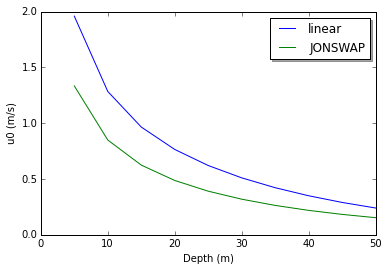

In [3]:
# compare orbital velocities
fig = plt.figure()
plt.plot(h,u0,label = 'linear')
plt.plot(h,u0s, label = 'JONSWAP')
#plt.ylim(ymax=0., ymin=-50)
plt.ylabel('u0 (m/s)')
plt.xlabel('Depth (m)')
plt.xlim(xmax=50., xmin=0)
legend = plt.legend(loc='upper right', shadow=True)

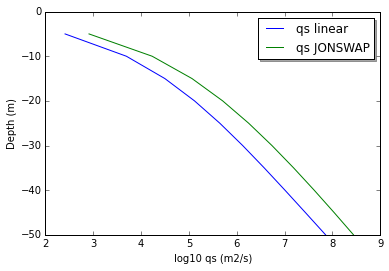

In [4]:
# reproduce Fig. 1. This does not exactly match. Maybe needs different ws (in K)?
fig = plt.figure()
plt.plot(-np.log10(-qs),-h,label = 'qs linear')
plt.plot(-np.log10(-qss),-h, label = 'qs JONSWAP')
plt.ylim(ymax=0., ymin=-50)
plt.xlabel('log10 qs (m2/s)')
plt.ylabel('Depth (m)')
legend = plt.legend(loc='upper right', shadow=True)

(9L,) (5L,) (9L, 5L)


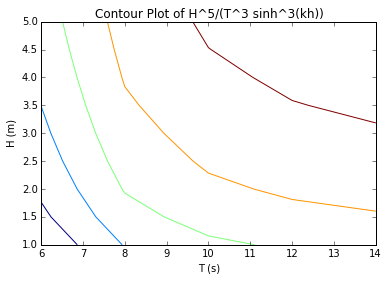

In [9]:
# calculate geomorphic wave
T = np.arange(6.,16.,2.)
H = np.arange(1.,5.5, .5)
h = 50.
M = np.zeros((len(H),len(T)))
print np.shape(H),np.shape(T),np.shape(M)
for i in xrange(len(H)):
    for j in xrange(len(T)):
        w = 2.*np.pi/T[j]
        kh = qkhfs(w,h)
        k = kh/h
        L = np.pi*2./k
        #M[i,j]=(H[i]**3/((T[j]**3)*np.sinh(kh)**3))*( (-15.*np.pi**2*H[i]**2)/(4.*T[j]*L*np.sinh(kh)**2) + \
        M[i,j]= (H[i]**5)/((T[j]**3)*(np.sinh(kh)**3))
        
H, T = np.meshgrid(T, H)
fig = plt.figure()
plt.contour(H,T,np.log10(M))
#plt.contour(H,T,M)
plt.title('Contour Plot of H^5/(T^3 sinh^3(kh))')
plt.ylabel('H (m)')
plt.xlabel('T (s)')

The equilibrium profiles are calculated using a simple integration...I think it is ok if enough points are included.
The functions and variables modified with "s" are Sherwood modifications to the equations. Reducing the u1 term (u1s)
by adding undertow has the counterintuitive result of flattening and even reversing the slope, because slope is the only term balancing the transport terms to acheive equilibrium.

In [6]:
# calculate equilibrium profiles

def StokesQ(h, T, H):
    """
    Calculate Stokes volume transport
    Assume onshore transport, so cos(theta) term = 1
    """
    g = 9.81
    w = 2.*np.pi/T
    kh = qkhfs(w,h)
    k = kh/h
    L = np.pi*2./k
    c = L/T
    Qw = g*H**2/(16.*c)
    return Qw

def u1_Stokes(h, T, H):
    """
    Assume a log profile and calc u1 at top of WBL
    """
    Qw = StokesQ(h, T, H)
    z0 = 0.001
    ubar = Qw/h
    ustr = ubar*0.41/(np.log(0.6*h/z0))
    # estimate the top of the WBL. Results are sensitive to this and z0
    # this should really be calculated with knowledge of tauw and D50
    zw = 0.01*T/(2.*np.pi)
    u = (ustr/0.41)*np.log(zw/z0)
    return u

def B0_func(h, T, H, ws):
    """
    Calculate equilibrium slope
    """
    w = 2.*np.pi/T
    kh = qkhfs(w,h)
    k = kh/h
    L = np.pi*2./k
    u0 = np.pi*H/(T*np.sinh(kh))
    u1 = 3.*np.pi**2*H**2/(4.*T*L*np.sinh(kh)**2)
    u2 = 3.*np.pi**2*H**2/(4.*T*L*np.sinh(kh)**4)
    B0 = (ws/u0**2)*(5.*u1 + 3.*u2)
    return B0

def B0s_func(h, T, H, ws ):
    """
    Calculate equilibrium slope with diff. terms
    """
    w = 2.*np.pi/T
    kh = qkhfs(w,h)
    k = kh/h
    L = np.pi*2./k
    u0s = np.sqrt(2.)*urms_25(H, T, h)
    u1s = 3.*np.pi**2*H**2/(4.*T*L*np.sinh(kh)**2)
    u1S = u1_Stokes(h, T, H)
    #print "u1s, u1S=",u1s,u1S
    u2s = 3.*np.pi**2*H**2/(4.*T*L*np.sinh(kh)**4)
    B0s = (ws/u0s**2)*(5.*(u1s) + 3.*u2s)
    return B0s

dz = 2.
z = np.arange(1.,100.+dz,dz)
x = np.zeros_like(z)
xs = np.zeros_like(z)
x[0] = 0.
xs[0]= 0.
for i in xrange(1,len(z)):
    # trapezoidal rule
    x[i] = x[i-1] + (z[i]-z[i-1])*0.5*(1./B0_func(z[i-1],T,H,ws)+1./B0_func(z[i],T,H,ws))
    xs[i] = xs[i-1] + (z[i]-z[i-1])*0.5*(1./B0s_func(z[i-1],T,H,ws)+1./B0s_func(z[i],T,H,ws))
    #print "i=",i, z[i], x[i], xs[i]

    
fig = plt.figure()
plt.plot(x, -z,label ='linear')
plt.plot(xs,-z,label='JONSWAP')
plt.xlabel('Offshore distance (m')
plt.ylabel('Depth (m)')
legend = plt.legend(loc='upper right', shadow=True)

ValueError: setting an array element with a sequence.

In [ ]:
whos